In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense

In [2]:
#importing data
data = pd.read_csv('titanic3.csv')

<Axes: xlabel='survived', ylabel='fare'>

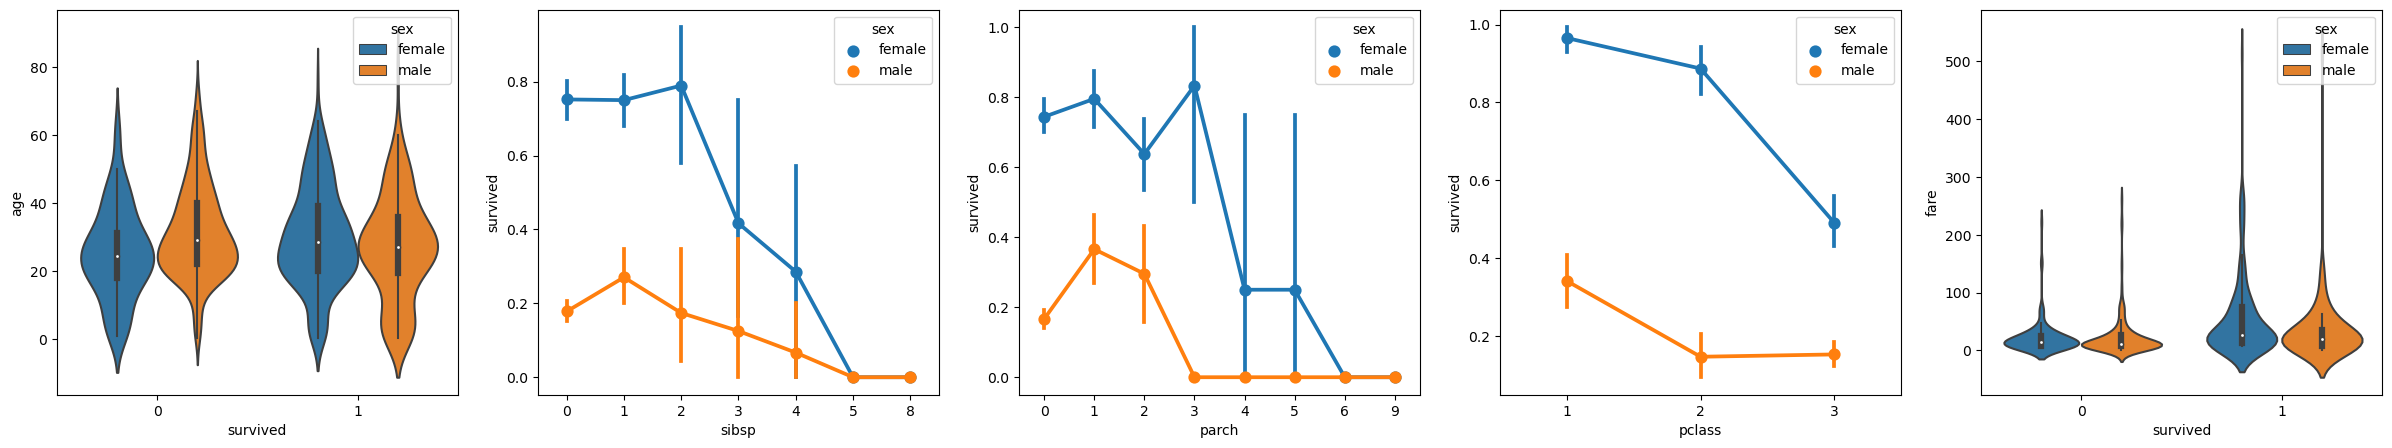

In [3]:
#Plotting Survivability Factors
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

# Data Cleaning

In [4]:
#Analyze Coorelation
data.replace({'male':1, 'female':0}, inplace=True)
data.corr().abs()[["survived"]]

data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

C:\Users\TraAL\AppData\Local\Temp\ipykernel_31332\1423449546.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]
C:\Users\TraAL\AppData\Local\Temp\ipykernel_31332\1423449546.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [5]:
#Drop the Nan values in the data and Drop sibsp and parch columns from the data
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

# Gaussian ML Model

In [6]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[["sex", "pclass", "age","relatives", "fare"]], data.survived, test_size=0.2, random_state=0)

In [7]:
#Normalization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
#Train Model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [9]:
#Testing model
predict_test =  model.predict(x_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


# Sequential Neural Network

In [10]:
# Add layers to the model
'''
Set to Layer 1 to 5 bc 5 input features: sex, pclass, age, relatives, and fare
Set to 5 for simplicity
Set to 1 bc 1 output (survivability)

relu used a general activation function, sigmoid used for last layer bc we need the survivability 
    scaled from 0 to 1
'''
    #
model = Sequential()

model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5)) 
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu')) 
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Train Model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 4ms/step - loss: 0.6924 - accuracy: 0.5873
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.6280
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.7404
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.7620
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.7656
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6138 - accuracy: 0.7751
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7703
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.7727
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.7751
Epoch 11/50
27/27 [

In [12]:
#Test model
y_pred = np.rint(model.predict(x_test)).flatten()
print(metrics.classification_report(y_test, y_pred))

7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       128
           1       0.78      0.62      0.69        81

    accuracy                           0.78       209
   macro avg       0.78      0.75      0.76       209
weighted avg       0.78      0.78      0.78       209

